In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
X_train = pd.read_csv("../Datasets/processed_heart_X_train.csv")
y_train = pd.read_csv("../Datasets/processed_heart_y_train.csv")

X_test = pd.read_csv("../Datasets/processed_heart_X_test.csv")
y_test = pd.read_csv("../Datasets/processed_heart_y_test.csv")


In [15]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()



In [16]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (736, 21)
y_train: (0,)
X_test: (184, 21)
y_test: (0,)


In [19]:
from sklearn.impute import SimpleImputer

# Use median imputation (best for medical numeric data)
imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)


In [18]:
X_train.isnull().sum().sort_values(ascending=False).head(10)


ca                 485
oldpeak             52
trestbps            50
thalch              47
chol                27
age                  0
fbs_True             0
thal_normal          0
slope_upsloping      0
slope_flat           0
dtype: int64

In [20]:
X_train.isnull().sum().sort_values(ascending=False).head()


age                0
cp_non-anginal     0
thal_normal        0
slope_upsloping    0
slope_flat         0
dtype: int64

In [21]:
X_train.isnull().sum().sum()


np.int64(0)

In [24]:
print(type(y_train))
print(y_train.shape)
print(y_train)


<class 'numpy.ndarray'>
(0,)
[]


In [25]:
import pandas as pd

y_train_df = pd.read_csv("../Datasets/processed_heart_y_train.csv")
y_test_df  = pd.read_csv("../Datasets/processed_heart_y_test.csv")


In [26]:
print(y_train_df.head())
print(y_train_df.shape)
print(y_train_df.columns)


Empty DataFrame
Columns: [target]
Index: []
(0, 1)
Index(['target'], dtype='object')


In [27]:
y_train = y_train_df.iloc[:, -1].to_numpy()
y_test  = y_test_df.iloc[:, -1].to_numpy()


In [28]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Unique classes:", np.unique(y_train))


y_train shape: (0,)
y_test shape: (0,)
Unique classes: []


In [29]:
import pandas as pd

heart_raw = pd.read_csv("../Datasets/heart_disease_uci.csv")


In [30]:
y = heart_raw['num'].apply(lambda x: 1 if x > 0 else 0)


In [31]:
X_train = pd.read_csv("../Datasets/processed_heart_X_train.csv")
X_test  = pd.read_csv("../Datasets/processed_heart_X_test.csv")


In [32]:
from sklearn.model_selection import train_test_split

_, _, y_train, y_test = train_test_split(
    heart_raw.drop(columns=['num']),  # dummy X, ignored
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [34]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Unique classes:", set(y_train))


X_train: (736, 21)
y_train: (736,)
Unique classes: {np.int64(0), np.int64(1)}


In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)


In [37]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:333: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linea

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [40]:
y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))


Accuracy: 0.8206521739130435
Precision: 0.8108108108108109
Recall: 0.8823529411764706
F1-score: 0.8450704225352113


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [41]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184



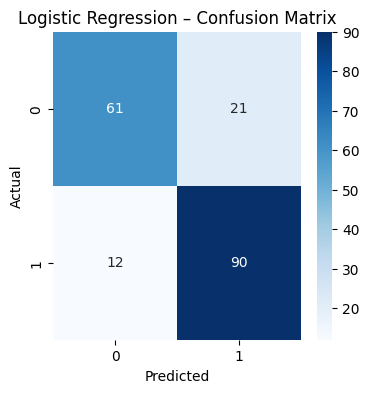

In [42]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


Logistic Regression provides an interpretable baseline model with balanced precision and recall, making it suitable for clinical decision support.